In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
traffic = pd.read_csv('Список сработок.csv', sep=';')
politics = pd.read_csv('Приоритеты по сработкам.csv', sep=';')
traffic['Политика'] = traffic['Политика'].str.strip()
politics['Политика'] = politics['Политика'].str.strip()
traffic

,Время,Источник,ID_события,Политика,Классификация политики,IP_Версия,Протокол,"Источник_MAC,",Источник_IP,Назначение_MAC,Назначение_IP,Инфо
0,06.05.2024 02:59,eth2,2402000,ET DROP Dshield Block Listed Source group 1,Misc Attack,IPv4,TCP,28:99:3a:a6:77:87,198.235.24.92 : 56585,0:c:29:c1:45:af,91.108.32.71 : 8443,1442828185044345
1,06.05.2024 02:59,eth2,2016778,ET DNS Query to a *.pw domain - Likely Hostile,Potentially Bad Traffic,IPv4,UDP,0:c:29:c1:45:af,91.108.32.71 : 24208,28:99:3a:a6:77:87,77.88.8.8 : 53,1794875915076289
2,06.05.2024 02:59,eth2,2402000,ET DROP Dshield Block Listed Source group 1,Misc Attack,IPv4,TCP,28:99:3a:a6:77:87,176.111.174.29 : 52852,0:c:29:c1:45:af,91.108.32.71 : 2222,1013138179754937
3,06.05.2024 02:59,eth2,2400029,ET DROP Spamhaus DROP Listed Traffic Inbound g...,Misc Attack,IPv4,TCP,28:99:3a:a6:77:87,176.111.174.29 : 52852,0:c:29:c1:45:af,91.108.32.71 : 2222,1013138179754937
4,06.05.2024 02:58,eth2,2403388,ET CINS Active Threat Intelligence Poor Reputa...,Misc Attack,IPv4,TCP,28:99:3a:a6:77:87,74.207.237.207 : 53241,0:c:29:c1:45:af,91.108.32.71 : 7071,1841061843992267
...,...,...,...,...,...,...,...,...,...,...,...,...
38246,05.05.2024 03:01,eth2,2402000,ET DROP Dshield Block Listed Source group 1,Misc Attack,IPv4,TCP,28:99:3a:a6:77:87,205.210.31.177 : 49532,a4:2a:95:df:76:d,91.108.32.72 : 4172,"7,16833E+14"
38247,05.05.2024 03:00,eth2,2012888,ET POLICY Http Client Body contains pwd= in cl...,Potential Corporate Privacy Violation,IPv4,TCP,0:c:29:c1:45:af,91.108.32.71 : 42582,28:99:3a:a6:77:87,87.250.251.14 : 80,1052253231955125
38248,05.05.2024 03:00,eth2,2400021,ET DROP Spamhaus DROP Listed Traffic Inbound g...,Misc Attack,IPv4,TCP,28:99:3a:a6:77:87,141.98.11.15 : 34613,a4:2a:95:df:76:d,91.108.32.72 : 3128,2094512945519386
38249,05.05.2024 03:00,eth2,2050883,ET INFO Observed DNS Query to vk .com API (api...,Misc activity,IPv4,UDP,0:c:29:c1:45:af,91.108.32.71 : 31120,28:99:3a:a6:77:87,77.88.8.8 : 53,"1,32619E+14"


In [3]:
# Политики в файле "Приоритеты по сработкам" написаны в общем виде, 
# в сработках есть дополнения в наименовании политик, поэтому нужна дополнительная проверка

policy_dict = {policy: level for policy, level in zip(politics['Политика'], politics['Уровень приоритета'])}

def find_priority(policy):
    for key in policy_dict:
        if policy.startswith(key):
            return policy_dict[key]
    return 'Не найдено'

In [4]:
traffic['Уровень приоритета'] = traffic['Политика'].apply(find_priority)

In [5]:
levels = traffic.groupby('Уровень приоритета').size().reset_index(name='Количество')

In [6]:
print('Количество сработок по уровням приоритетности')

ordered_categories = ['Высокий', 'Средний', 'Низкий', 'Не найдено']
levels['Уровень приоритета'] = pd.Categorical(levels['Уровень приоритета'], categories = ordered_categories, ordered = True)
levels = levels.sort_values('Уровень приоритета')
levels

Количество сработок по уровням приоритетности


,Уровень приоритета,Количество
0,Высокий,21
3,Средний,3669
2,Низкий,3129
1,Не найдено,31432


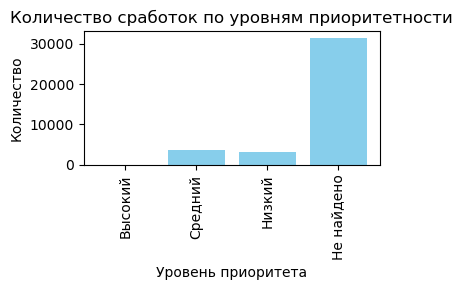

In [8]:
plt.figure(figsize=(4, 3))
plt.bar(levels['Уровень приоритета'], levels['Количество'], color='skyblue')
plt.title('Количество сработок по уровням приоритетности')
plt.xlabel('Уровень приоритета')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [213]:
notfound_traffic = traffic[traffic['Уровень приоритета'] == 'Не найдено']
notfound_politics = notfound_traffic['Политика'].unique()
print('Список политик, которых нет в файле:')
for policy in notfound_politics:
    print(policy)

Список политик, которых нет в файле:
ET DNS Query to a *.pw domain - Likely Hostile
ET DNS Query for .to TLD
ET INFO DNS Query for Suspicious .icu Domain
ET INFO DNS Query for Suspicious .ga Domain
GPL RPC xdmcp info query
ET DNS Query to a .tk domain - Likely Hostile
ET INFO DYNAMIC_DNS Query to a *.farted .net Domain
ET DNS Query to a *.top domain - Likely Hostile
ET INFO Observed DNS Query to vk .com API (api .vk .com)
ET DNS Query for .cc TLD
ET INFO DYNAMIC_DNS Query to *.duckdns. Domain
ET INFO DYNAMIC_DNS Query to a *.duckdns .org Domain
ET INFO DNS Query for Suspicious .cf Domain
ET INFO Telegram API Domain in DNS Lookup
ET POLICY possible Xiaomi phone data leakage DNS
ET INFO Observed DNS Query to .world TLD
ET INFO External IP Lookup Service in DNS Query (ip-info .ff .avast .com)
ET EXPLOIT Realtek SDK - Command Execution/Backdoor Access Inbound (CVE-2021-35394)
ET INFO Observed DNS Query to .life TLD
ET INFO Observed DNS Query to .work TLD
ET INFO Packed Executable Download


In [166]:
def trim_ip(ip):
    return ip[:-8]


In [177]:
ips_sourse = traffic[['Источник_IP', 'Уровень приоритета']].copy()

In [178]:
ips_sourse['Без порта_Источник_IP'] = ips_sourse['Источник_IP'].apply(trim_ip)

In [205]:
ips_sourse_groupped = ips_sourse.groupby('Без порта_Источник_IP').size().reset_index(name='Количество')
print('IP-адреса источники и их количество')
ips_sourse_sort = ips_sourse_groupped.sort_values(by='Количество', ascending=False)
ips_sourse_sort

IP-адреса источники и их количество


,Без порта_Источник_IP,Количество
1536,91.108.32.71,29664
1535,91.108.32.7,4531
223,185.243.5.5,48
1501,80.75.212.75,44
179,176.111.174.29,34
...,...,...
1053,35.203.211.8,1
1054,35.203.211.80,1
1055,35.203.211.81,1
1057,35.203.211.83,1


In [173]:
ips_destination = traffic[['Назначение_IP', 'Уровень приоритета']].copy()
ips_destination['Без порта_Назначение_IP'] = ips_destination['Назначение_IP'].apply(trim_ip)

ips_destination = ips_destination.groupby('Без порта_Назначение_IP').size().reset_index(name='Количество')
print('IP-адреса назначения и их количество')
ips_destination_sort = ips_destination.sort_values(by='Количество', ascending=False)
ips_destination_sort

IP-адреса назначения и их количество


,Без порта_Назначение_IP,Количество
266,91.108.32.7,2222
196,5.153.182.123,1558
216,77.88.,1438
267,91.108.32.71,688
123,2.22.37.,630
...,...,...
285,93.186.237,1
173,45.33.23.18,1
248,87.250.251,1
262,91.1,1


In [180]:
ips_sourse

,Источник_IP,Уровень приоритета,Без порта_Источник_IP
0,198.235.24.92 : 56585,Средний,198.235.24.92
1,91.108.32.71 : 24208,Не найдено,91.108.32.71
2,176.111.174.29 : 52852,Средний,176.111.174.29
3,176.111.174.29 : 52852,Средний,176.111.174.29
4,74.207.237.207 : 53241,Средний,74.207.237.207
...,...,...,...
38246,205.210.31.177 : 49532,Средний,205.210.31.177
38247,91.108.32.71 : 42582,Средний,91.108.32.71
38248,141.98.11.15 : 34613,Средний,141.98.11.15
38249,91.108.32.71 : 31120,Не найдено,91.108.32.71


In [197]:
high_ips_sourse = ips_sourse[ips_sourse['Уровень приоритета'] == 'Высокий']
high_ips_sourse = high_ips_sourse.groupby('Без порта_Источник_IP').size().reset_index(name='Количество').sort_values(by='Количество',ascending=False )
print('Количество IP-адресов высокого уровня')
high_ips_sourse

Количество IP-адресов высокого уровня


,Без порта_Источник_IP,Количество
2,183.81.169.238,12
1,179.43.180.108,6
3,2.57.122.110,2
0,152.199.19.,1


In [196]:
medium_ips_sourse = ips_sourse[ips_sourse['Уровень приоритета'] == 'Средний']
medium_ips_sourse = medium_ips_sourse.groupby('Без порта_Источник_IP').size().reset_index(name='Количество').sort_values(by='Количество',ascending=False )
print('Количество IP-адресов среднего уровня')
medium_ips_sourse

Количество IP-адресов среднего уровня


,Без порта_Источник_IP,Количество
1398,80.75.212.75,44
147,176.111.174.29,34
1381,79.124.58.18,30
148,176.111.174.30,24
1395,80.66.83.49,24
...,...,...
811,35.203.210.98,1
815,35.203.211.104,1
816,35.203.211.105,1
818,35.203.211.107,1


In [198]:
low_ips_sourse = ips_sourse[ips_sourse['Уровень приоритета'] == 'Низкий']
low_ips_sourse = low_ips_sourse.groupby('Без порта_Источник_IP').size().reset_index(name='Количество').sort_values(by='Количество',ascending=False )
print('Количество IP-адресов низкого уровня')
low_ips_sourse

Количество IP-адресов низкого уровня


,Без порта_Источник_IP,Количество
140,91.108.32.71,2463
139,91.108.32.7,327
41,185.243.5.5,48
138,91.108.150.244,25
114,45.143.9.16,11
...,...,...
62,198.235.24.218,1
61,198.235.24.213,1
60,198.235.24.206,1
59,198.235.24.198,1


In [199]:
notfound_ips_sourse = ips_sourse[ips_sourse['Уровень приоритета'] == 'Низкий']
notfound_ips_sourse = notfound_ips_sourse.groupby('Без порта_Источник_IP').size().reset_index(name='Количество').sort_values(by='Количество',ascending=False )
print('Количество IP-адресов, которые не были найдены')
notfound_ips_sourse

Количество IP-адресов, которые не были найдены


,Без порта_Источник_IP,Количество
140,91.108.32.71,2463
139,91.108.32.7,327
41,185.243.5.5,48
138,91.108.150.244,25
114,45.143.9.16,11
...,...,...
62,198.235.24.218,1
61,198.235.24.213,1
60,198.235.24.206,1
59,198.235.24.198,1
